# Objective:
In this project,objective is to find the best model to predict the popularity of online news,using machine learning techniques.
I am analyzing articles popularity using target variable - shares which indicated number of times that article is shared. This can help online news companies who can check popularity of article before publishing it. Also, it can help businesses which rely heavily on social networks

In [ ]:
What type of article ,published on what day of the week, with how many number of words/images/videos  will become popular ?

# Data Description : 
The data was collected from the UCI Machine Learning repository. It contains the content of all the articles published during a two year period, from 2013 to 2015on Mashable (mashable.com).
(https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)
The dataset consists of 39644 records and 61 attributes.

# Data Features:

Attribute Information:
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)


# Importing Required Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Loading the Dataset as Pandas Dataframe

In [78]:
data = pd.read_csv(r"C:\Users\lakshya_hanshvik\Desktop\Datasets/OnlineNewsPopularity.csv")
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Checking the shape of the dataframe; number of rows and columns.

In [79]:
data.shape

(39644, 61)

#Data Information:
As we can see below, no null records exist in the dataset


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

## Data Cleaning

Checking for Missing Values
 The UCI machine learning repository which hosts the current data set has indicated that the data set has no missing values
#As we can see below, no null records exist in the dataset

In [81]:
#total number of NULL values across the whole dataset

data.isnull().sum()

url                               0
timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
 data_channel_is_entertainment    0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                  

#From the available 60 attribute , we can drop 

URL - Since every URL is unique for each column


In [82]:
data= data.drop(['url'],axis=1)

Statistical summary of the dataset

In [83]:
for i in list(data.columns):
    print(i)
    print(data[i].describe())
    print("***********************************************")

timedelta
count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64
***********************************************
n_tokens_title
count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64
***********************************************
n_tokens_content
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64
***********************************************
n_unique_tokens
count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max     

Name: self_reference_avg_sharess, dtype: float64
***********************************************
weekday_is_monday
count    39644.000000
mean         0.168020
std          0.373889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_monday, dtype: float64
***********************************************
weekday_is_tuesday
count    39644.000000
mean         0.186409
std          0.389441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_tuesday, dtype: float64
***********************************************
weekday_is_wednesday
count    39644.000000
mean         0.187544
std          0.390353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: weekday_is_wednesday, dtype: float64
***********************************************
weekday_is_thursday
count    39644.000000
mean   

# Target variable
Distribution of the target attribute "shares"

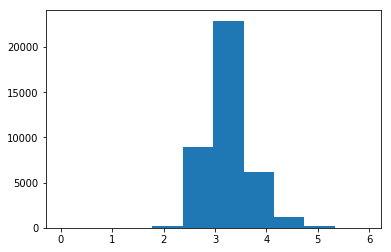

In [84]:
plt.hist(np.log10(data['shares']))
plt.show()

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


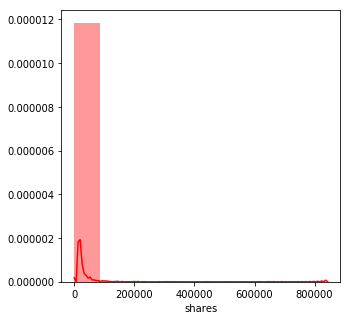

In [85]:
#print(data['shares'].describe())
plt.figure(figsize=(5,5))
sns.distplot(data['shares'], color='r', bins=10)

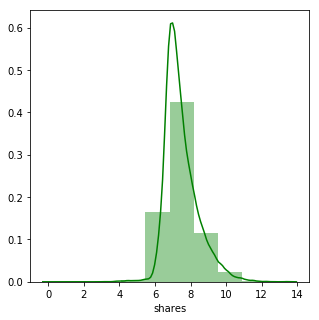

In [86]:
plt.figure(figsize=(5,5))
sns.distplot(np.log(data['shares']), color='g', bins=10)

##Data in Histogram

Plotting the histogram to find missing values which are represented as zero.

While checking the dataset for 0 values, I found 0 values in
rate_positive_words, rate_negative _words, and
average_token_length variables

The Histograms also show that there are many categorical variables.

['data_channel_is_lifestyle',' data_channel_is_entertainment ', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world','kw_max_max',' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', 'is_weekend']


C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


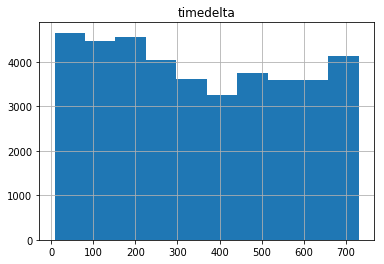

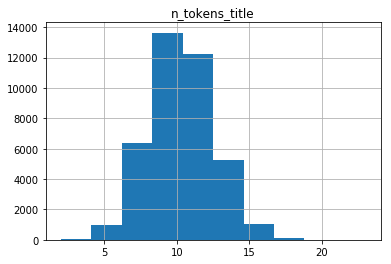

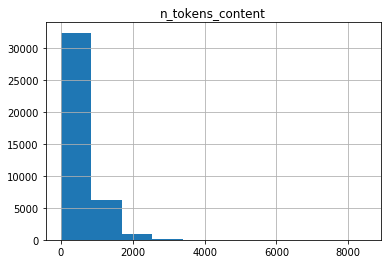

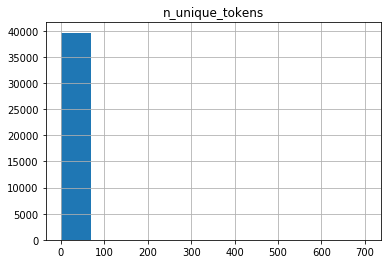

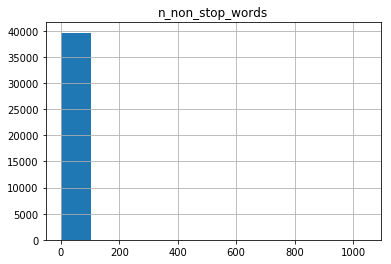

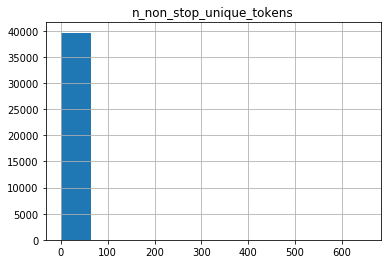

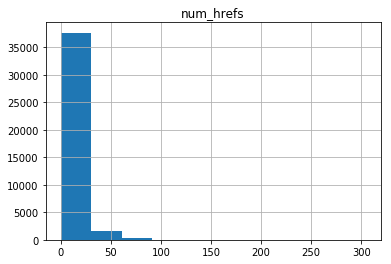

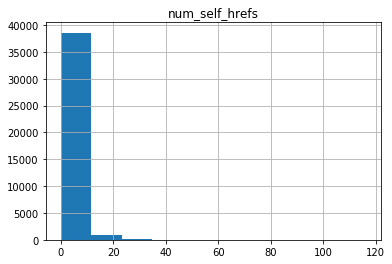

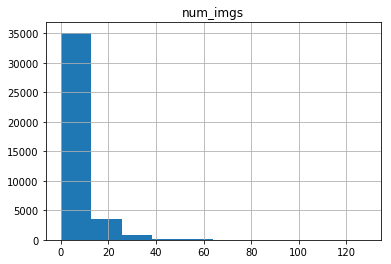

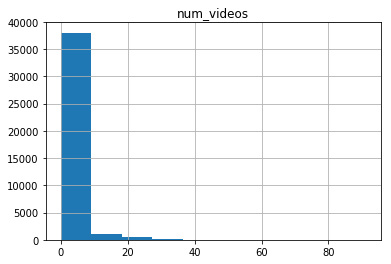

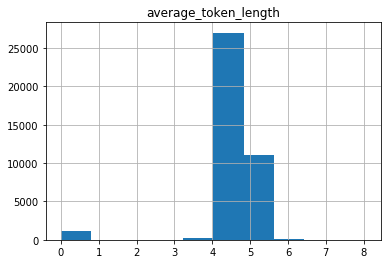

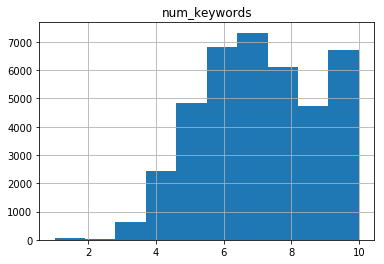

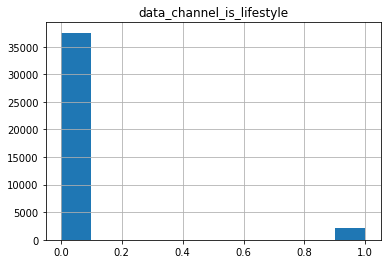

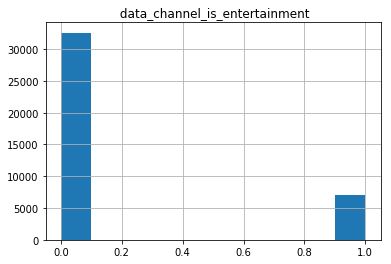

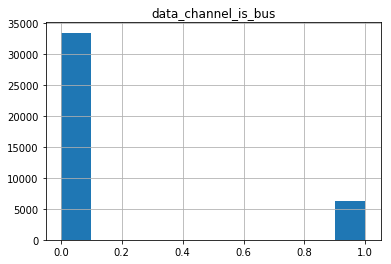

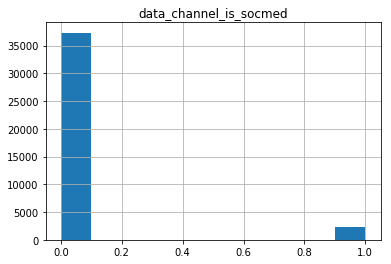

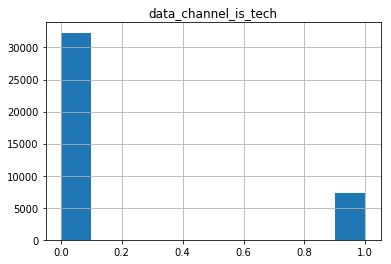

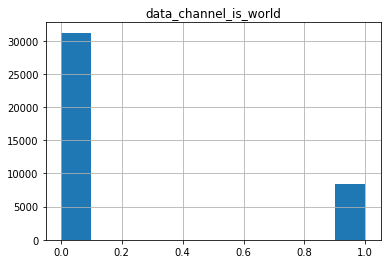

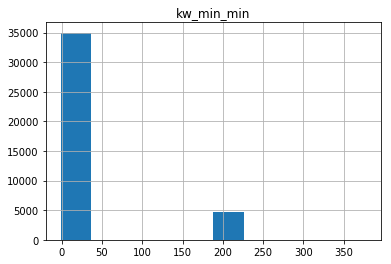

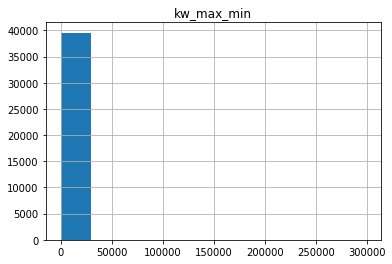

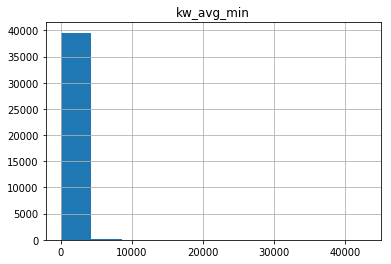

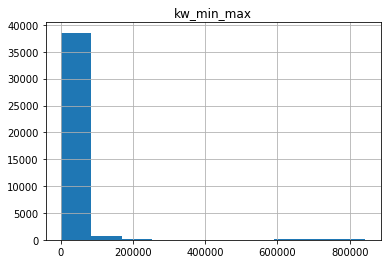

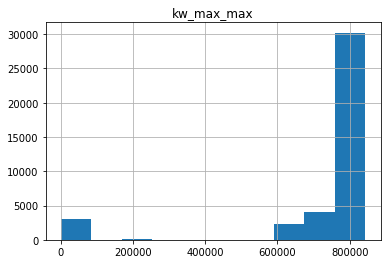

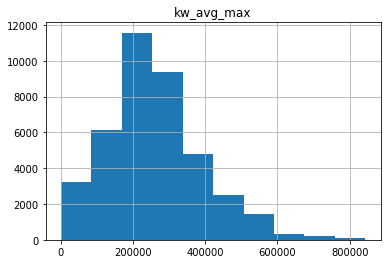

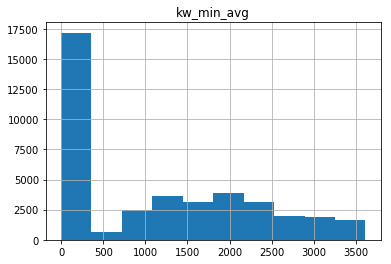

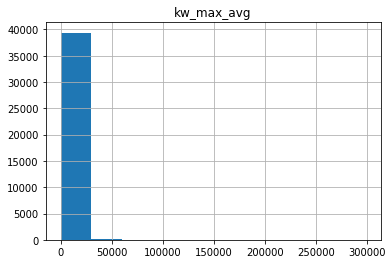

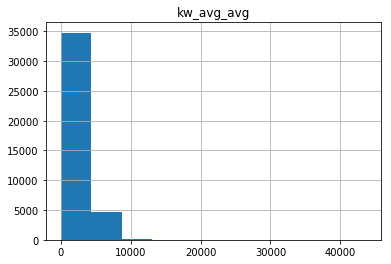

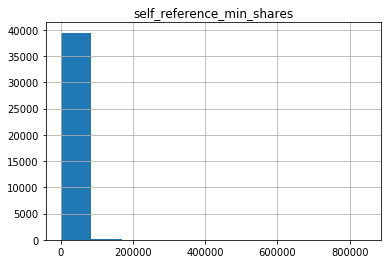

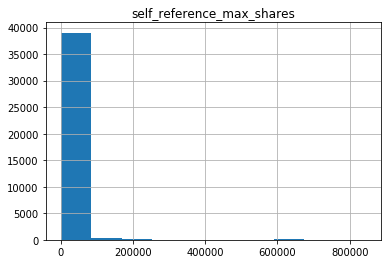

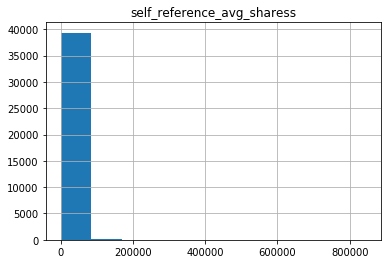

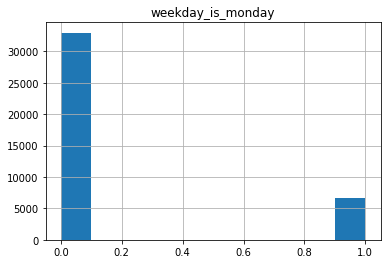

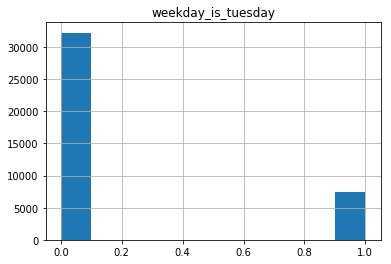

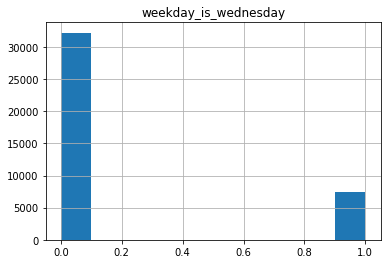

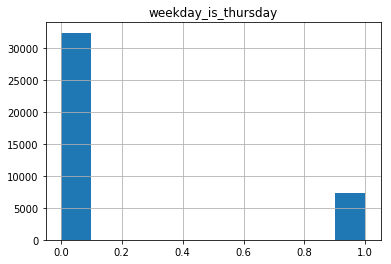

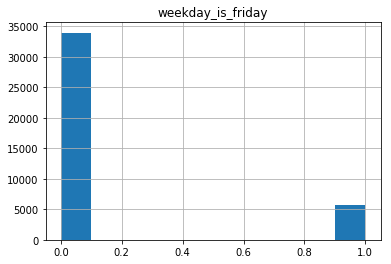

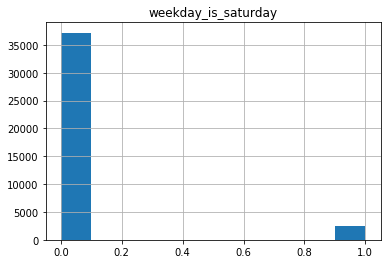

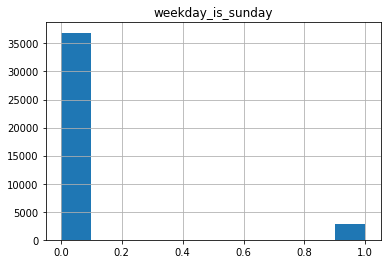

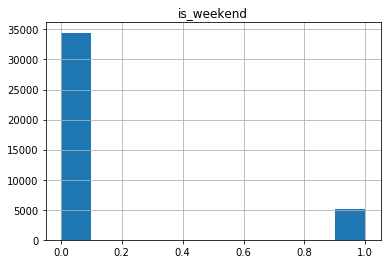

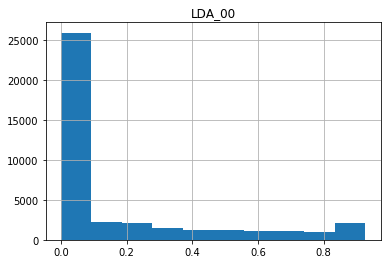

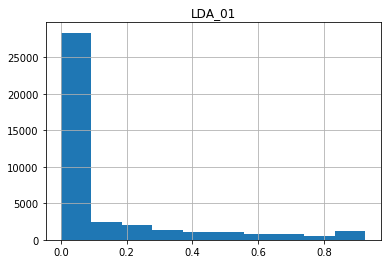

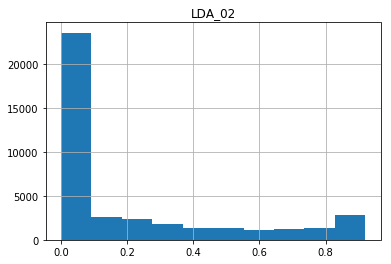

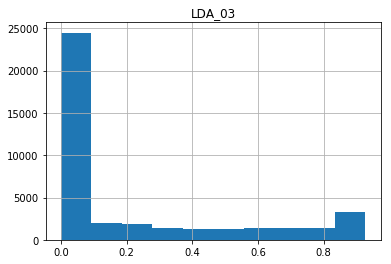

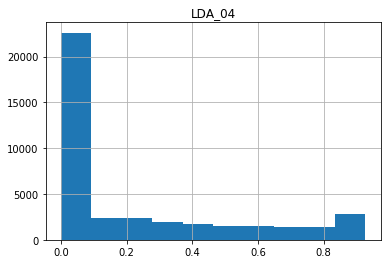

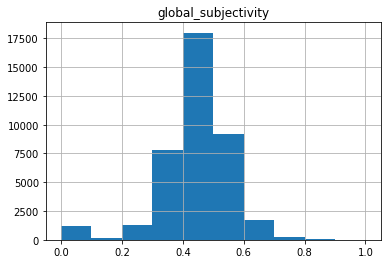

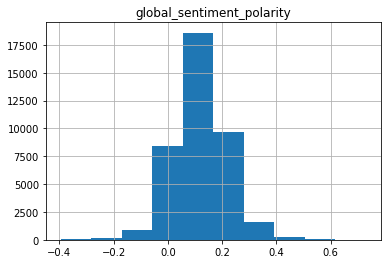

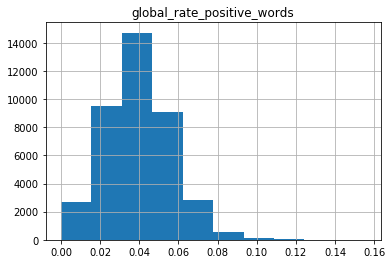

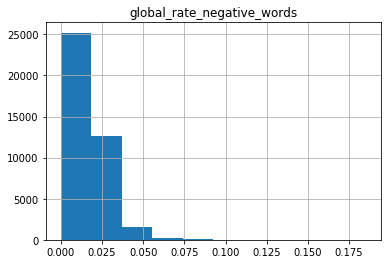

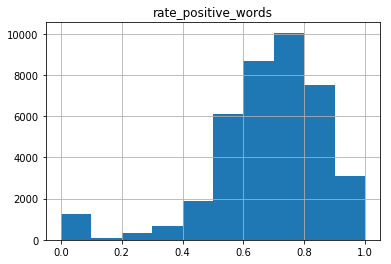

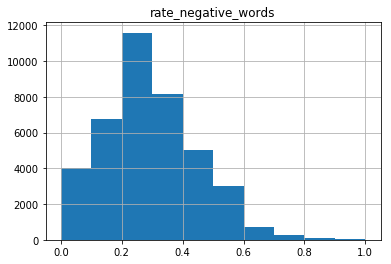

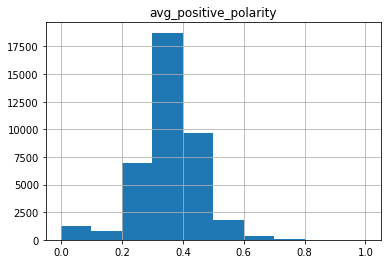

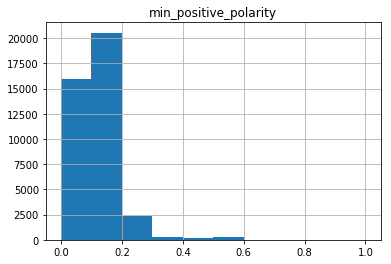

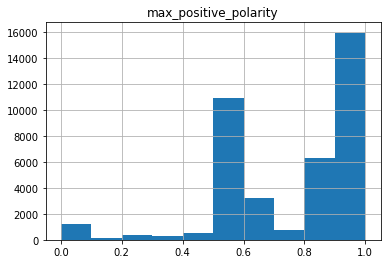

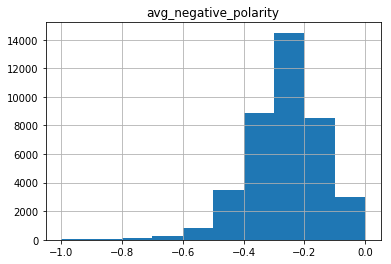

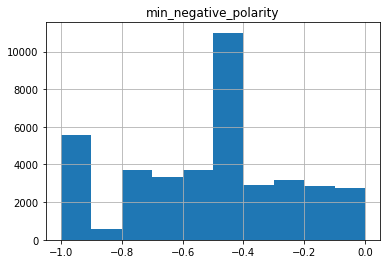

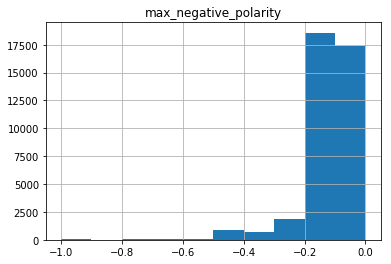

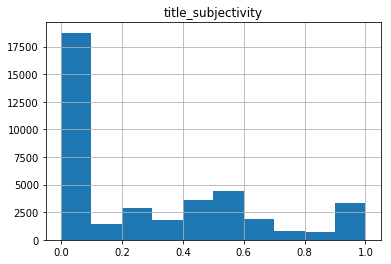

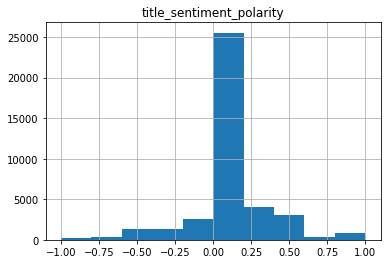

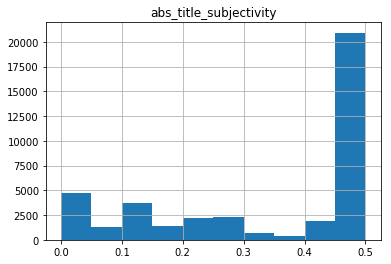

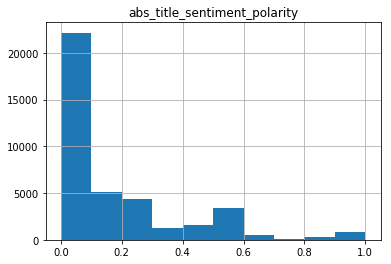

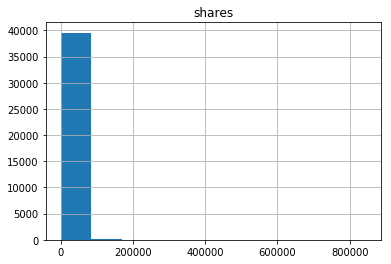

In [87]:
for i in data.iloc[:,0:60]:
    data.hist(i,bins=10)

# Removing the 0 values from  rate_positive_words, rate_negative words, and average_token_length variables

In [88]:
print("number of 0 values in the average_token_length = {}".format(len(data[data.average_token_length == 0])))

print("number of 0 values in the rate_negative_words = {}".format(len(data[data.rate_negative_words == 0])))

print("number of 0 values in the rate_positive_words = {}".format(len(data[data.rate_positive_words == 0])))


number of 0 values in the average_token_length = 1181
number of 0 values in the rate_negative_words = 2550
number of 0 values in the rate_positive_words = 1217


In [89]:

data = data[data.average_token_length != 0]
data = data[data.rate_positive_words + data.rate_negative_words != 0]
data.shape

(38458, 60)

# Outliers

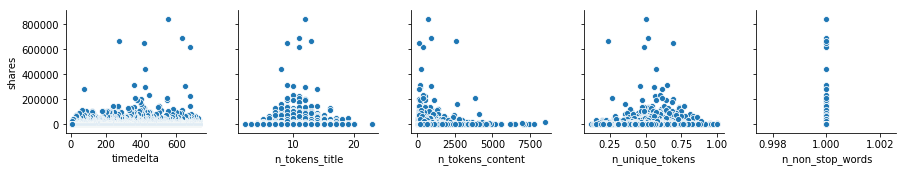

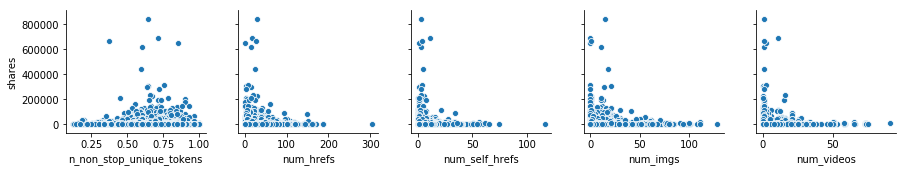

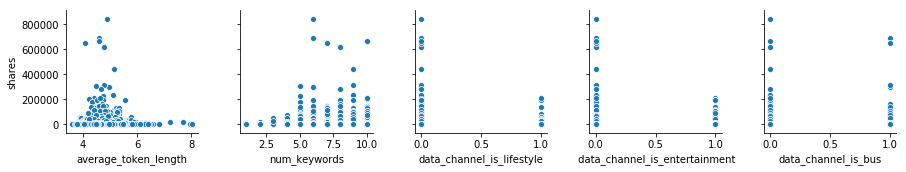

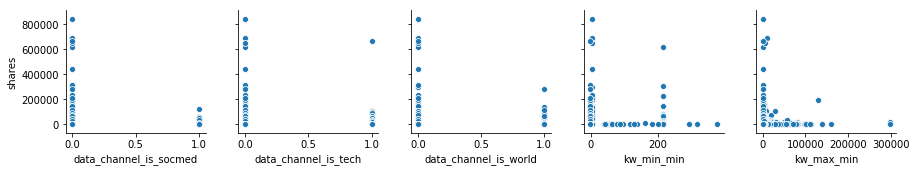

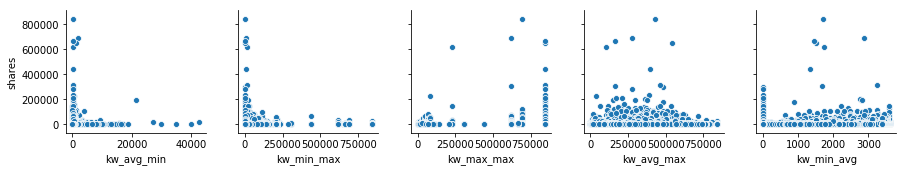

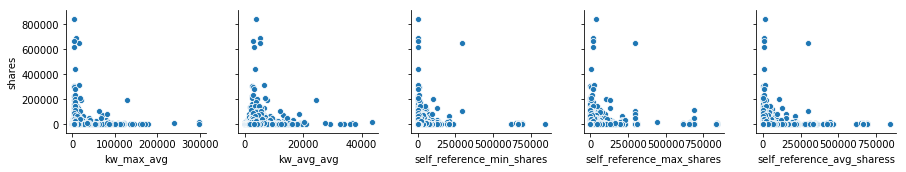

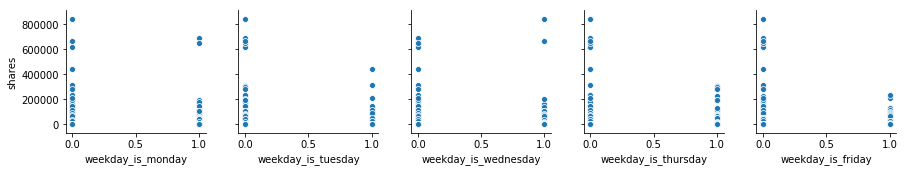

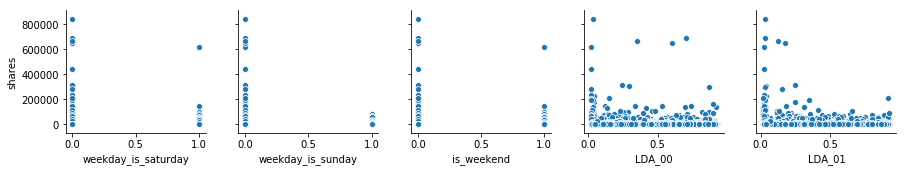

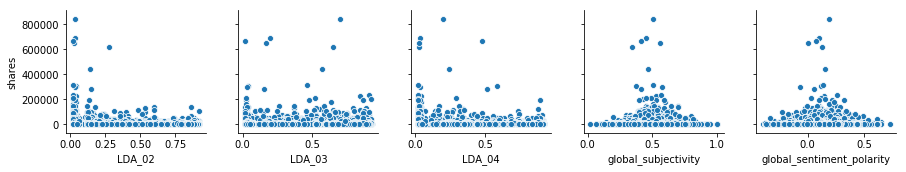

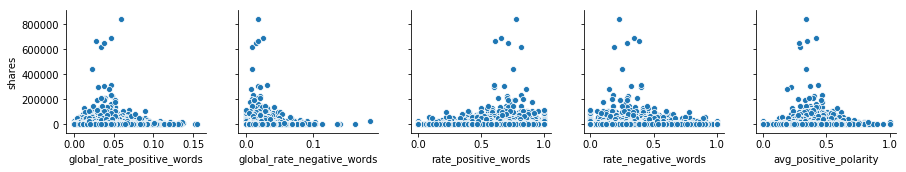

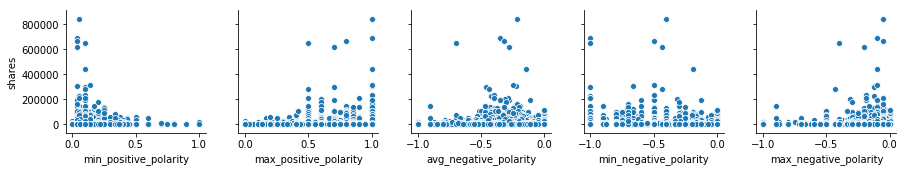

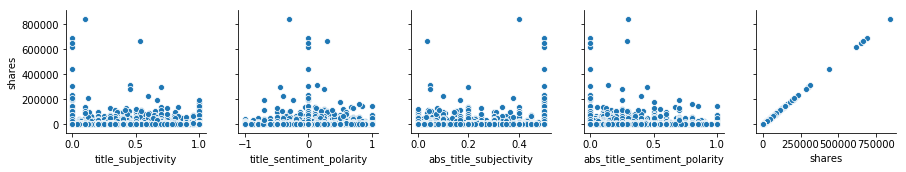

In [90]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['shares'])


From the above pair plots , we can clearly see that following attributes have outliers .

n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens ,
n_tokens_title , num_hrefs ,num_self_hrefs 

I will be deleting those observations from those attributes

In [91]:
data = data[data.n_non_stop_words <=1]  
data = data[data.n_unique_tokens <=1]
data = data[data.n_non_stop_unique_tokens<=1]
data = data[data.num_hrefs <200]
data = data[data.num_self_hrefs <100]
data = data[data.n_tokens_title <=20]
        

data.shape

(38455, 60)

In [92]:
list_cat=['data_channel_is_lifestyle',' data_channel_is_entertainment', 
             'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world','weekday_is_monday', 
            'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday',
             'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
categorical_data= data[list_cat]
categorical_data.head()

data_numerical =  data.drop(list_cat, axis= 1)
data_numerical.head()
categorical_data.head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analysing Data with box plots

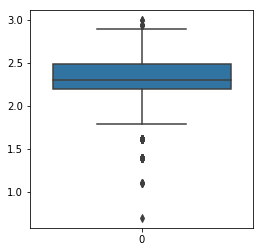

In [93]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=np.log(data['n_tokens_title']))
plt.show()

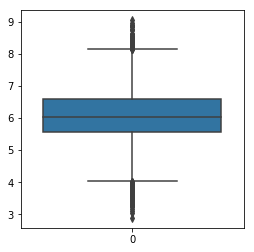

In [94]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=np.log(data['n_tokens_content']))
plt.show()

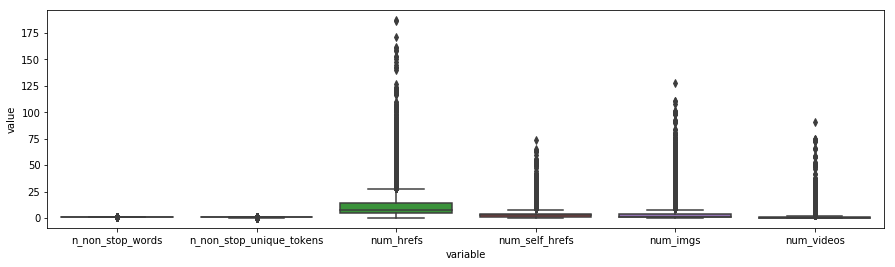

In [95]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,4:10]))
plt.show()

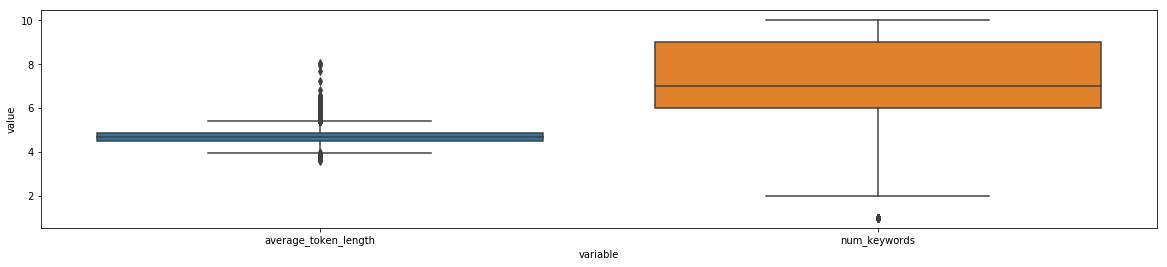

In [96]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,10:12]))
plt.show()

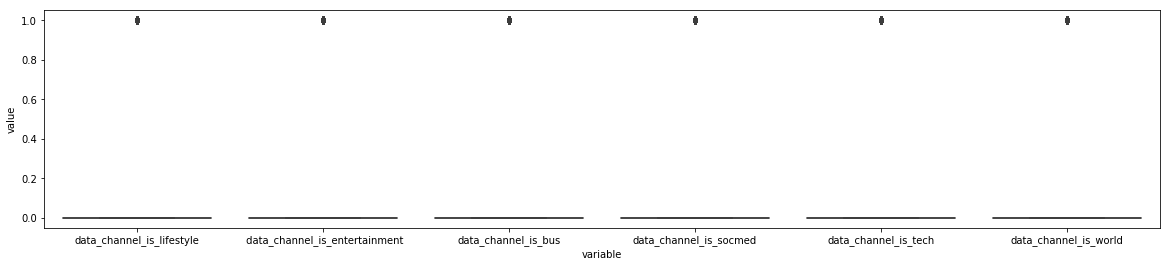

In [97]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,12:18]))
plt.show()

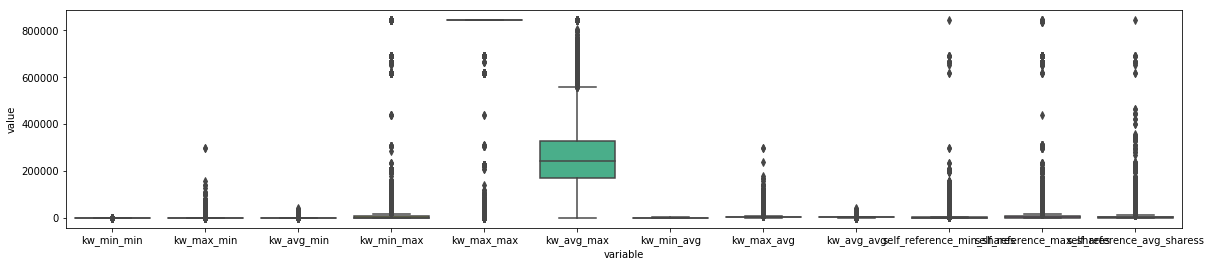

In [98]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,18:30]))
plt.show()

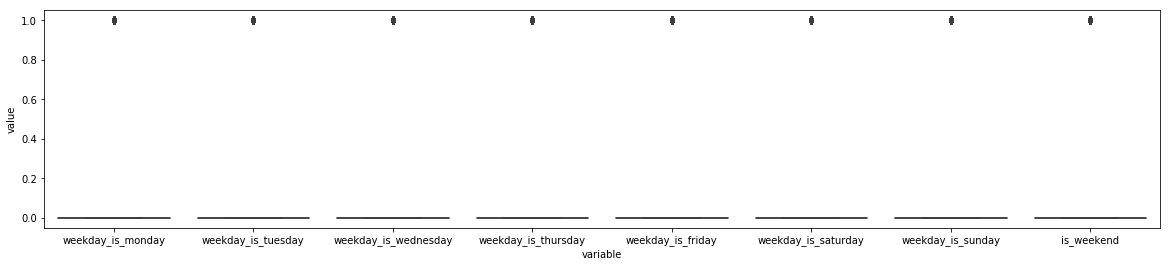

In [99]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,30:38]))
plt.show()

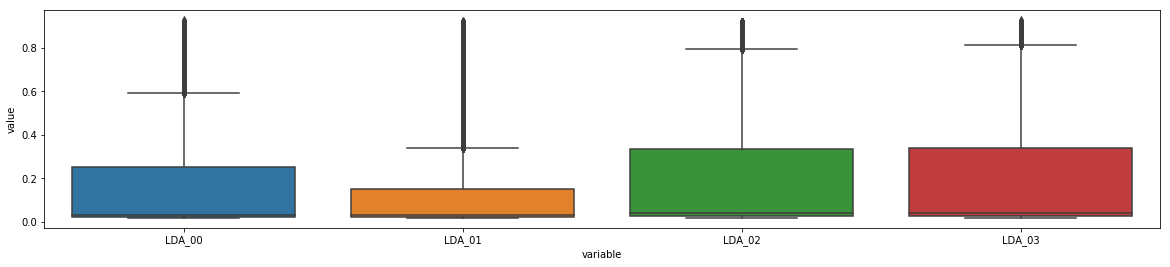

In [100]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,38:42]))
plt.show()

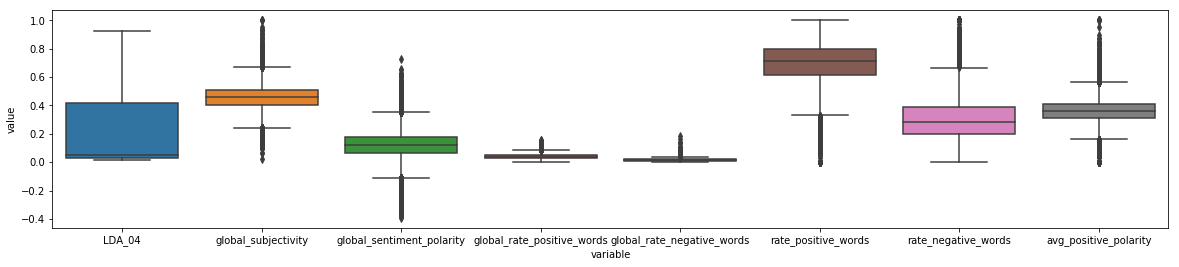

In [101]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,42:50]))
plt.show()

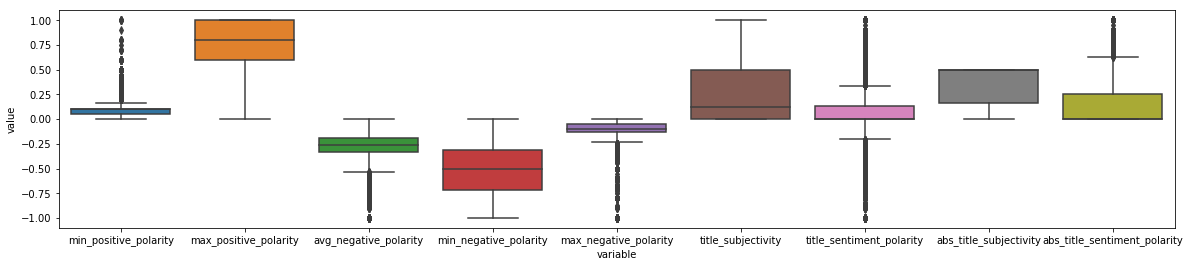

In [102]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="variable", y = "value", data=pd.melt( data.iloc[:,50:59]))
plt.show()

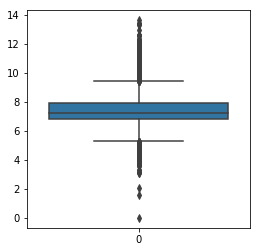

In [103]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=np.log(data['shares']))
plt.show()

# Removing Outliers  : Method 1 , using Interquartile Range


In [104]:
#Step1: Finding Median, First quartile(Q1), Third quartile(Q3), Interquartile range(IQR)

shares_stats= data['shares'].describe()
Q1 = round(shares_stats['25%'] , 4)
Q3 = round(shares_stats['75%'] , 4)
median = round(shares_stats['50%'] , 4)        
IQR = Q3-Q1
print(shares_stats)

#Step 2 :Finding minor outlier 

lower_threshold_minor = Q1 - (1.5 * IQR)
upper_threshold_minor = Q3 + (1.5 * IQR)
print("minor outliers")
print(lower_threshold_minor,upper_threshold_minor)

#Step 3 :Finding major outlier
lower_threshold_major = Q1 - (3 * IQR)
upper_threshold_major = Q3 + (3 * IQR)
print("major ouliers")
print(lower_threshold_major,upper_threshold_major)

data_no_outliers = data[data["shares"]<=8362]
data_no_outliers.shape

count     38455.000000
mean       3355.363022
std       11587.123061
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64
minor outliers
-1687.5 5332.5
major ouliers
-4320.0 7965.0


(35832, 60)

In [105]:
#statistics of target variable after removing outliers
data_no_outliers['shares'].describe()

count    35832.000000
mean      1911.132200
std       1534.047753
min          1.000000
25%        920.000000
50%       1300.000000
75%       2300.000000
max       8300.000000
Name: shares, dtype: float64

#pair plots after removing outliers

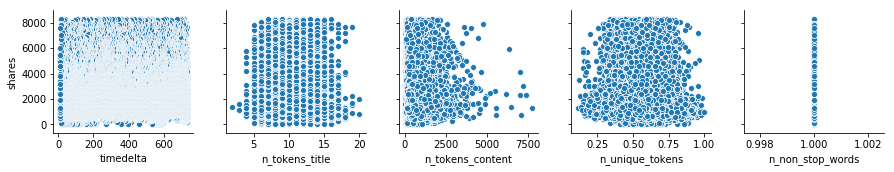

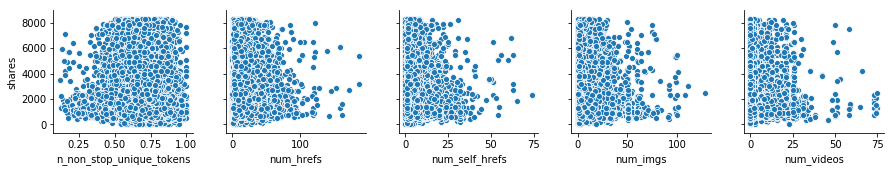

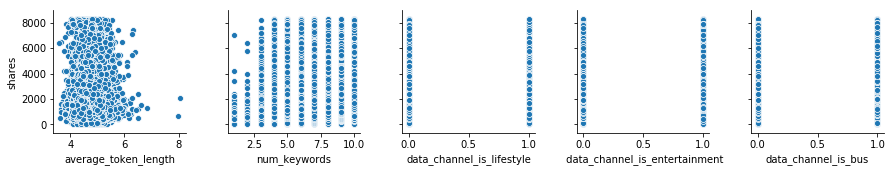

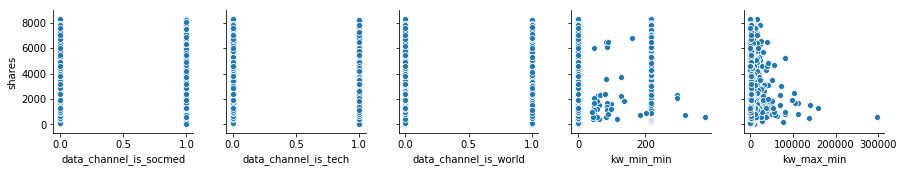

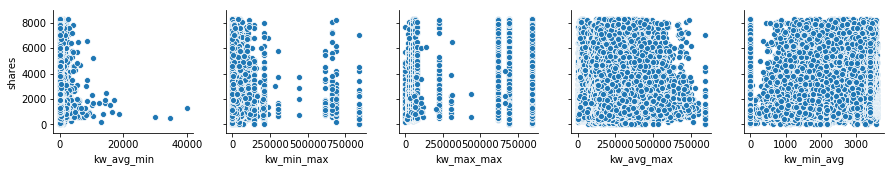

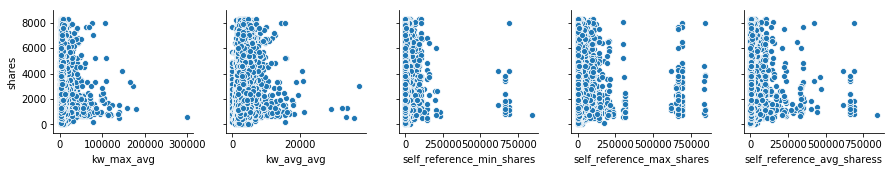

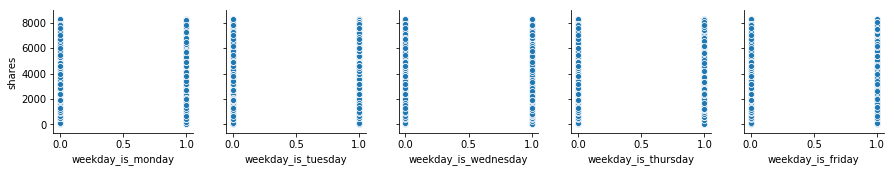

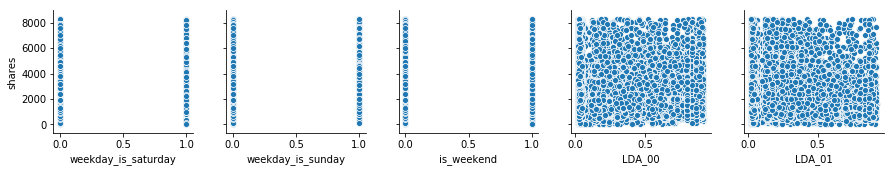

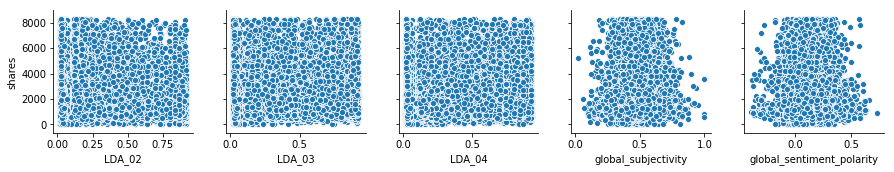

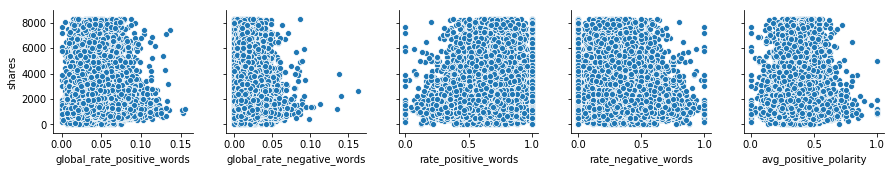

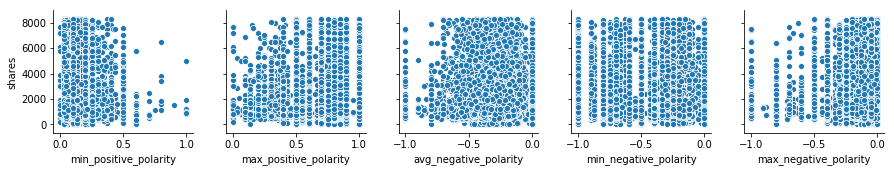

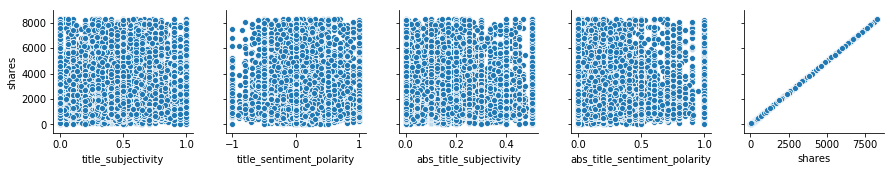

In [106]:
for i in range(0, len(data_no_outliers.columns), 5):
    sns.pairplot(data=data_no_outliers,
                x_vars=data_no_outliers.columns[i:i+5],
                y_vars=['shares'])

# Removing Outliers  : Method 2 , using Standard Deviation

In [107]:


shares_stats= data['shares'].describe()
median = round(shares_stats['50%'] , 4) 
STD = round(shares_stats['std'] , 4)        

#D = [i  for i in data['shares']  if( median- 2*STD) < i < (median+ 2*STD)]
data_no_outliers_std = data[data.shares >( median- 2*STD)] 
data_no_outliers_std = data[data.shares < (median+ 2*STD)]
data_no_outliers_std

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


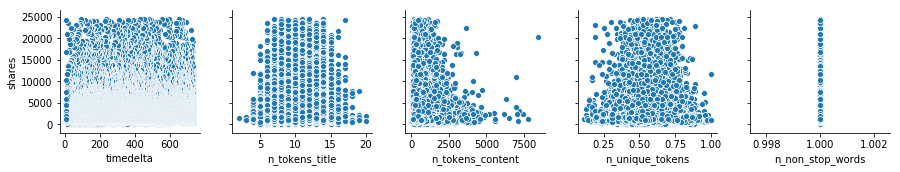

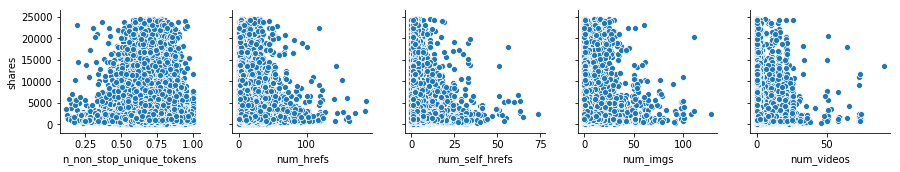

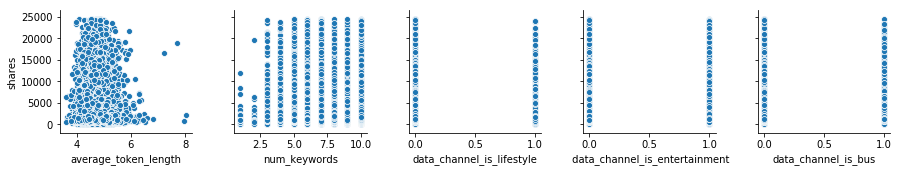

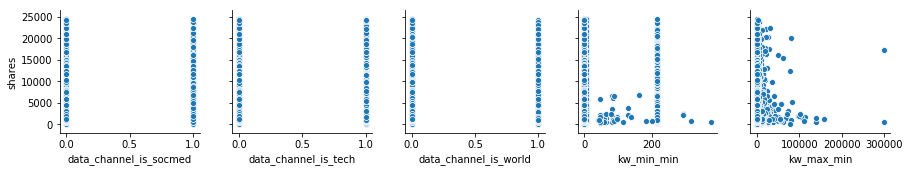

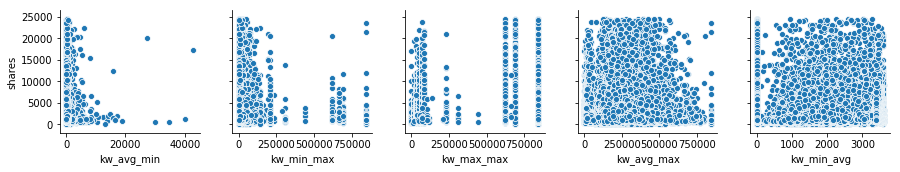

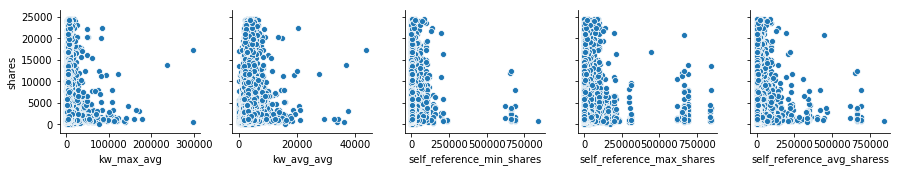

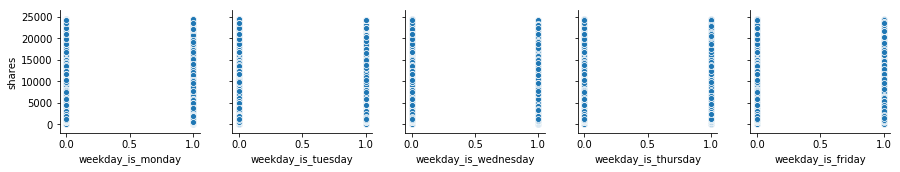

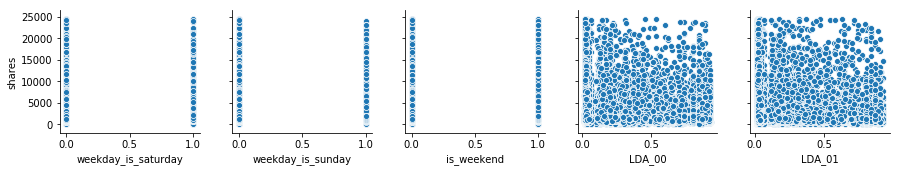

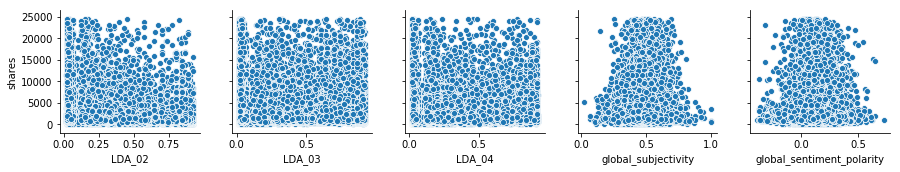

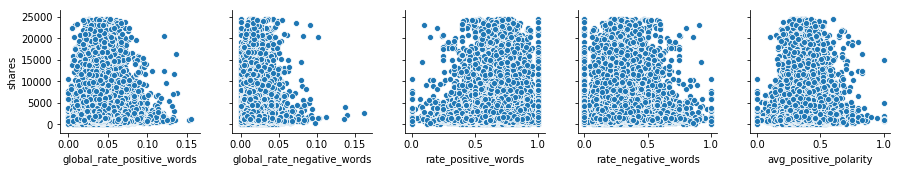

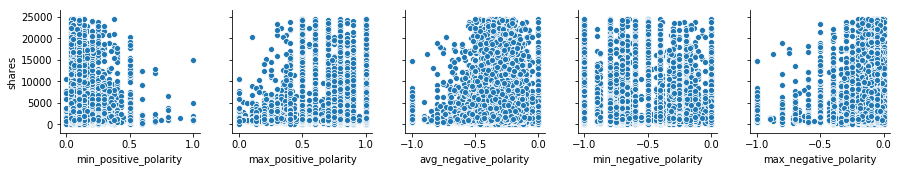

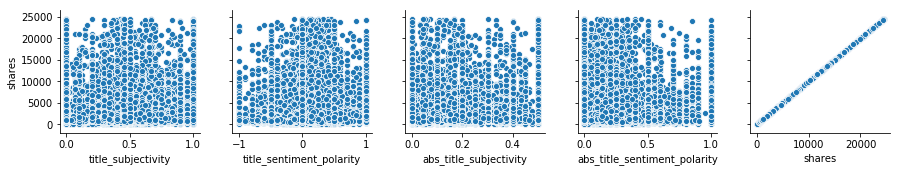

In [108]:
for i in range(0, len(data_no_outliers_std.columns), 5):
    sns.pairplot(data=data_no_outliers_std,
                x_vars=data_no_outliers_std.columns[i:i+5],
                y_vars=['shares'])

#Method 1 (using Inter quartile range ) --- we lost 9.5% of data

#Method 2(using Standard Deviation) ---- we lost only 4.5% of  data, 
considering this I prefer Method 2

# Correlation between the data

In [116]:

data_correlation= data_no_outliers_std.corr()
data_correlation

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.234937,-0.100132,0.134367,-0.133048,0.106224,-0.027702,0.043984,-0.034336,-0.001365,...,0.019778,0.017189,0.061809,0.121625,-0.032727,-0.013148,0.039031,0.013524,0.000160,0.032128
n_tokens_title,-0.234937,1.000000,0.028698,-0.030337,0.041818,-0.018280,-0.047083,-0.007206,-0.005837,0.051780,...,-0.014947,0.002694,-0.035096,-0.046449,0.003777,0.078799,0.000774,-0.150404,0.041439,-0.022456
n_tokens_content,-0.100132,0.028698,1.000000,-0.749647,0.600906,-0.601860,0.407174,0.286304,0.357715,0.103033,...,-0.324877,0.372527,-0.065180,-0.417767,0.277007,0.012299,0.026986,0.004105,0.020995,0.017937
n_unique_tokens,0.134367,-0.030337,-0.749647,1.000000,-0.796001,0.885550,-0.316561,-0.213162,-0.342929,0.013776,...,0.351051,-0.325912,0.026328,0.340540,-0.276187,0.016383,-0.028449,-0.021811,-0.002211,-0.004406
n_non_stop_words,-0.133048,0.041818,0.600906,-0.796001,1.000000,-0.642804,0.334504,0.183056,0.235453,0.076608,...,-0.411959,0.357150,-0.107529,-0.396972,0.268333,-0.020730,0.012814,0.042104,-0.002388,-0.003204
n_non_stop_unique_tokens,0.106224,-0.018280,-0.601860,0.885550,-0.642804,1.000000,-0.373438,-0.216277,-0.478920,-0.005797,...,0.227327,-0.244462,0.024282,0.232504,-0.176449,-0.013710,-0.043967,-0.003560,-0.030498,-0.031131
num_hrefs,-0.027702,-0.047083,0.407174,-0.316561,0.334504,-0.373438,1.000000,0.382444,0.358032,0.116886,...,-0.128227,0.239314,-0.098839,-0.225291,0.092939,0.051384,0.043019,0.006570,0.063717,0.089037
num_self_hrefs,0.043984,-0.007206,0.286304,-0.213162,0.183056,-0.216277,0.382444,1.000000,0.248614,0.077288,...,-0.114174,0.134239,-0.006274,-0.082485,0.072485,-0.007257,0.029403,0.006399,-0.002432,0.018795
num_imgs,-0.034336,-0.005837,0.357715,-0.342929,0.235453,-0.478920,0.358032,0.248614,1.000000,-0.064671,...,-0.031403,0.179632,-0.072104,-0.141890,0.048395,0.060152,0.046270,-0.012517,0.064239,0.079349
num_videos,-0.001365,0.051780,0.103033,0.013776,0.076608,-0.005797,0.116886,0.077288,-0.064671,1.000000,...,-0.015079,0.136447,-0.116934,-0.139548,0.031579,0.061945,0.023094,-0.023784,0.057759,0.037294


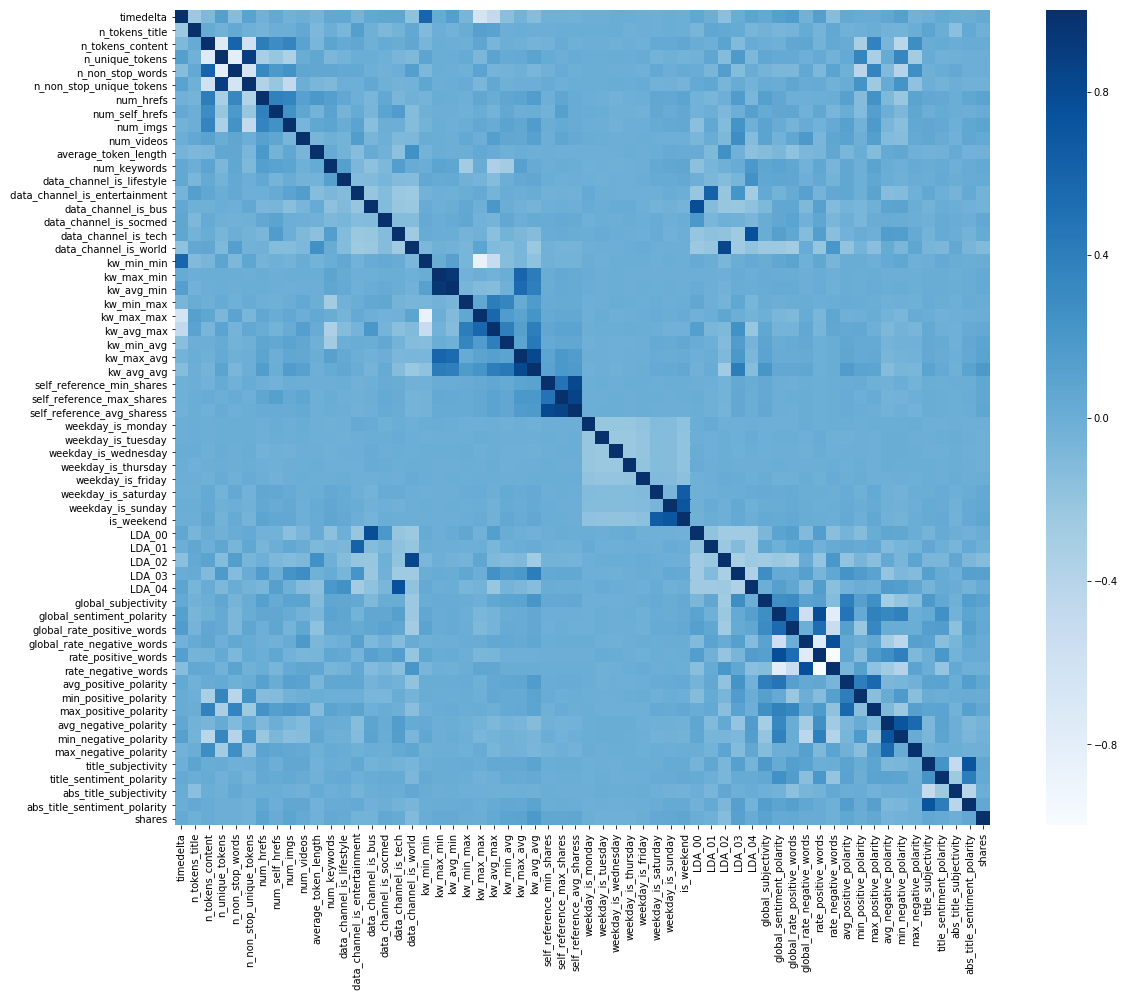

In [117]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_correlation, vmax=1, cmap= 'Blues',square=True,ax=ax);

plt.show()

In [118]:
#Now we'll try to find which features  that are strongly correlated with shares

data_correlation['shares'].sort_values(ascending=False)

shares                            1.000000
kw_avg_avg                        0.180303
LDA_03                            0.116904
global_subjectivity               0.109280
kw_max_avg                        0.092023
num_hrefs                         0.089037
num_imgs                          0.079349
kw_min_avg                        0.079052
self_reference_avg_sharess        0.072245
is_weekend                        0.072025
avg_positive_polarity             0.062947
self_reference_min_shares         0.062725
self_reference_max_shares         0.060412
data_channel_is_socmed            0.054615
max_positive_polarity             0.052633
weekday_is_sunday                 0.052159
abs_title_sentiment_polarity      0.051062
title_subjectivity                0.049027
num_keywords                      0.046613
weekday_is_saturday               0.045959
kw_avg_max                        0.041086
global_rate_positive_words        0.040614
title_sentiment_polarity          0.037674
global_sent